# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [158]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data_df = pd.merge(study_results,mouse_metadata , on="Mouse ID", how ="left") 
# Display the data table for preview
merged_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [175]:
# Checking the number of mice.
len(merged_data_df['Mouse ID'].unique())

249

In [160]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_ids= merged_data_df[merged_data_df.duplicated(['Mouse ID','Timepoint'],keep = False)]['Mouse ID'].unique()
duplicate_ids

array(['g989'], dtype=object)

In [161]:
# Optional: Get all the data for the duplicate mouse ID. 
data_duplicate = merged_data_df[merged_data_df['Mouse ID']=='g989']
data_duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [166]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_merged = merged_data_df[merged_data_df['Mouse ID'].isin(dup_mice_ID)==False]
cleaned_merged

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [177]:
# Checking the number of mice in the clean DataFrame
len(cleaned_merged["Mouse ID"].unique()) 

248

## Summary Statistics

In [186]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
#Creating a new dataframe with each column that calculates the mentional properties
summ_stats= pd.DataFrame({'Mean Tumor Volume':cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).mean(),
                        'Median Tumor Volume':cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).median(),
                         'Tumor Volume Variance':cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).var(),
                         'Tumor Volume Std. Dev.':cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).std(),
                         'Tumor Volume Std. Err.':cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).sem()})
summ_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [207]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
agg_summary = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    var='var',
    std='std',
    sem='sem'
)
# # Displaying the summary statistics table
agg_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

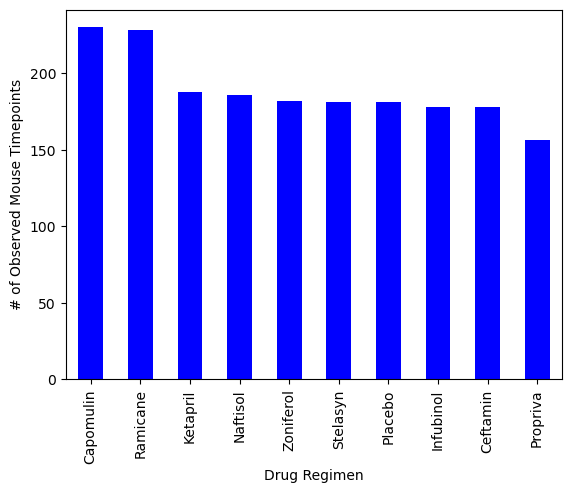

In [222]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
row_for_drug = cleaned_df['Drug Regimen'].value_counts() #row_for_drug has the value counts for each regimen 
row_for_drug.plot.bar(color='b')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')


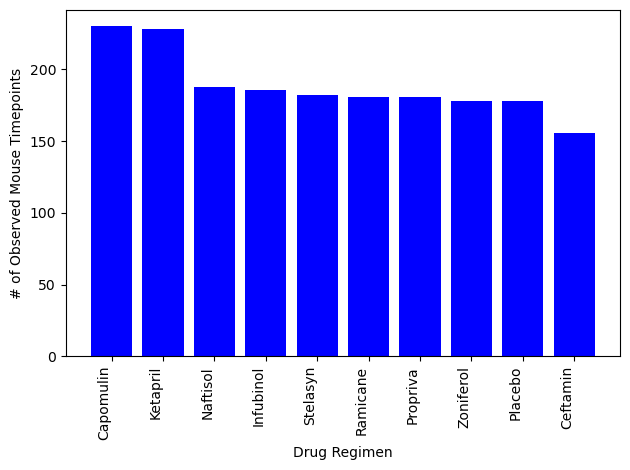

In [246]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = cleaned_df['Drug Regimen'].unique() #Getting the names of the treatments
plt.bar(x_axis, row_for_drug, color ='blue') #row_for_drug is used from the cell above, row_for_drug has the value counts for each regimen 
plt.xlabel('Drug Regimen')
plt.xticks(rotation=90, ha='right') #rotating the xlabels
plt.ylabel('# of Observed Mouse Timepoints')
plt.tight_layout()

<AxesSubplot:ylabel='Sex'>

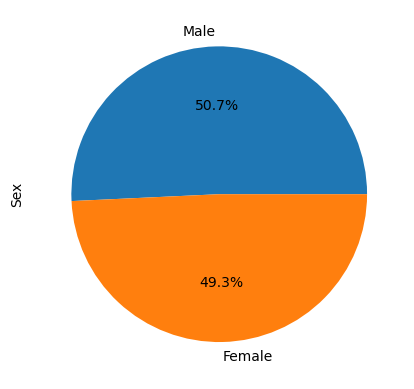

In [272]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
dd = cleaned_df['Sex'].value_counts()  #Getting the values for each gender
dd.plot.pie(autopct= "%1.1f%%")


Text(0, 0.5, 'Sex')

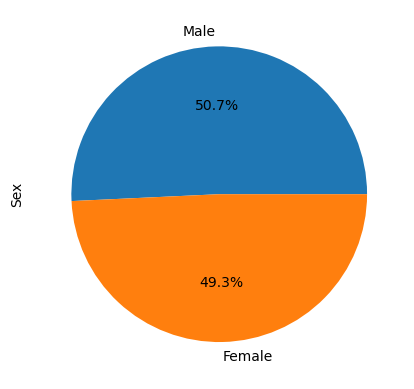

In [273]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male = (cleaned_df['Sex'].value_counts()[0]/len(cleaned_df['Sex'].values))*100 #Calculating the male population
female = (cleaned_df['Sex'].value_counts()[1]/len(cleaned_df['Sex'].values))*100  #Calculating the female population
data= [male,female]
plt.pie(data,labels = ['Male','Female'],autopct='%1.1f%%')
plt.ylabel('Sex')

## Quartiles, Outliers and Boxplots

In [336]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_data = cleaned_df[(cleaned_df['Drug Regimen'] == 'Capomulin') |        #Filtering the data for the mentioned treatments
                            (cleaned_df['Drug Regimen'] == 'Ramicane') |
                            (cleaned_df['Drug Regimen'] == 'Infubinol') |
                            (cleaned_df['Drug Regimen'] == 'Ceftamin')]
# Start by getting the last (greatest) timepoint for each mouse
greatest_tp = treatment_data.groupby('Mouse ID').max()['Timepoint']

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume_data = pd.merge(greatest_tp, treatment_data , on = ['Mouse ID', 'Timepoint'], how = 'left')
tumor_volume_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [330]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
outliers_dict = {} 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in regimens: 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    rows_mice = tumor_volume_data[tumor_volume_data['Drug Regimen']==regimen]['Tumor Volume (mm3)']
    # add subset 
    tumor_vol_data.append(rows_mice)
    
    # Determine outliers using upper and lower bounds
    regimen_quartiles = rows_mice.quantile([.25,.5,.75])
    lower_quartile = regimen_quartiles[0.25]
    upper_quartile = regimen_quartiles[0.75]
    inter_qr = upper_quartile - lower_quartile
    
    lower_bound = lower_quartile - (1.5*inter_qr)
    upper_bound = upper_quartile + (1.5*inter_qr)
    
    # Find outliers
    regimen_outliers = [value for value in rows_mice if value < lower_bound or value > upper_bound]
    # Store outliers in the dictionary
    outliers_dict[regimen] = regimen_outliers
    # Print the treatment name with its corresponding outliers
    print(f"Outliers for {regimen}: {regimen_outliers}")

Outliers for Capomulin: []
Outliers for Ramicane: []
Outliers for Infubinol: [36.3213458]
Outliers for Ceftamin: []


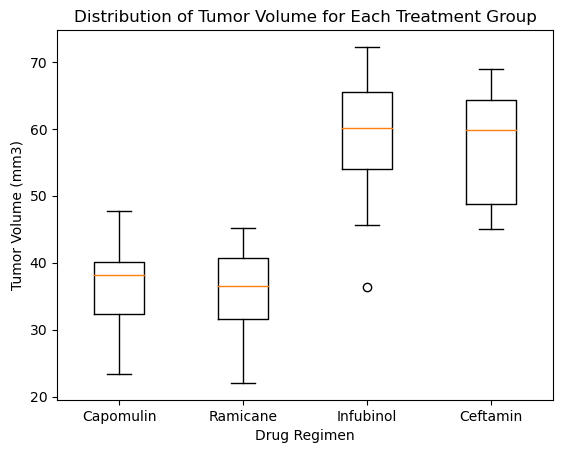

In [412]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=regimens, widths = 0.4, vert=True)

# Set labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')

# Show the plot
plt.show()

## Line and Scatter Plots

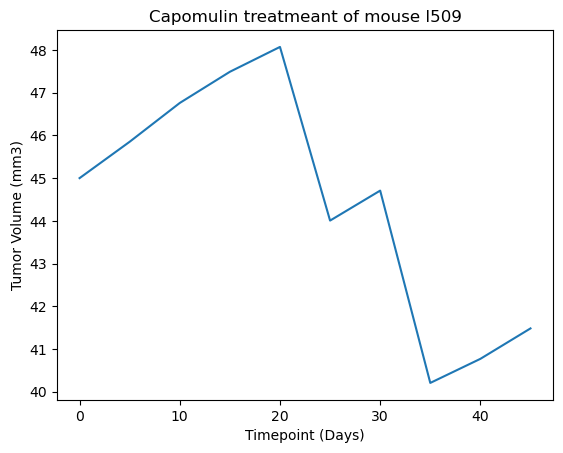

In [410]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse_id = cleaned_df[cleaned_df["Mouse ID"] == "l509"]
plt.plot(single_mouse_id['Timepoint'],single_mouse_id['Tumor Volume (mm3)'])
plt.title('Capomulin treatmeant of mouse l509')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

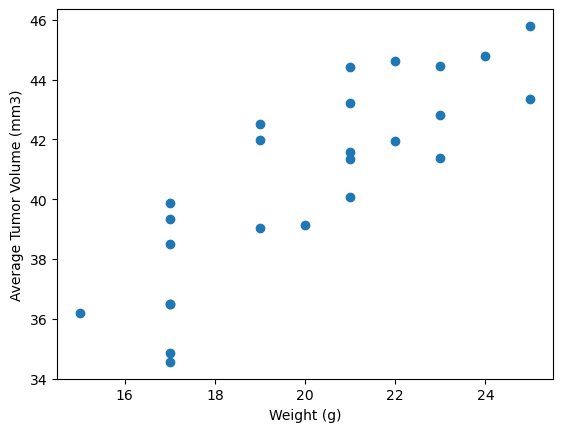

In [411]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = cleaned_df[(cleaned_df['Drug Regimen'] == 'Capomulin')]
average = capomulin_df.groupby('Mouse ID').mean()
plt.scatter(average['Weight (g)'], average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


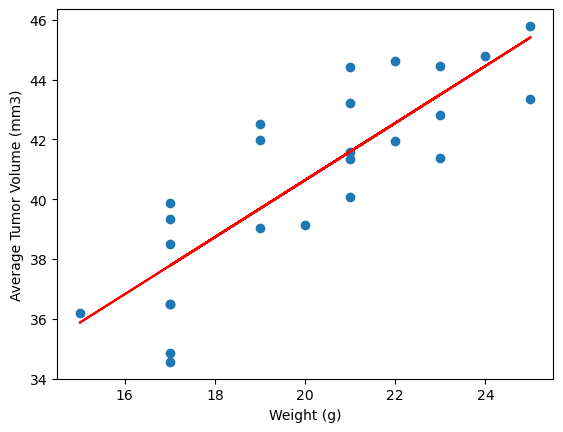

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
